**Problem Statement**:
> The objective of this project is to predict the daily bike rental count based on the environmental and seasonal settings. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
import os
import warnings 
warnings.filterwarnings('ignore')

In [2]:
input_path=r"C:\Users\ELdrago\Desktop\Edwisor\Projects\Bike Rental Count\Python_Code\Input_files"
output_path=r"C:\Users\ELdrago\Desktop\Edwisor\Projects\Bike Rental Count\Python_Code\Output_files"
bike_data=pd.read_csv(input_path+"\day.csv")


In [3]:
 bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Inference:
> Good thing about the data is that all the categorical variables have numerical values

In [4]:
bike_data.shape

(731, 16)

In [5]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
bike_data.rename(columns={'instant':'ID','dteday':'dateday','mnth':'month',
                          'weathersit':'weather_situation','yr':'year',
                          'hum': 'humidity','cnt':'count'},inplace=True)
tar_var="count"
bike_data.columns

Index(['ID', 'dateday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_situation', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
bike_data.head()

,ID,dateday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<h1 align= center>Exploratory Data Analysis </h1>

## A)Univariate Analysis

In [9]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
ID                   731 non-null int64
dateday              731 non-null object
season               731 non-null int64
year                 731 non-null int64
month                731 non-null int64
holiday              731 non-null int64
weekday              731 non-null int64
workingday           731 non-null int64
weather_situation    731 non-null int64
temp                 731 non-null float64
atemp                731 non-null float64
humidity             731 non-null float64
windspeed            731 non-null float64
casual               731 non-null int64
registered           731 non-null int64
count                731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
for i in bike_data.columns:
    print(i, bike_data[i].nunique())

ID 731
dateday 731
season 4
year 2
month 12
holiday 2
weekday 7
workingday 2
weather_situation 3
temp 499
atemp 690
humidity 595
windspeed 650
casual 606
registered 679
count 696


In [11]:
#changing datatype accordingly
bike_data['dateday']=pd.to_datetime(bike_data.dateday)
bike_data['season']=bike_data.season.astype('category')
bike_data['year']=bike_data.year.astype('category')
bike_data['month']=bike_data.month.astype('category')
bike_data['holiday']=bike_data.holiday.astype('category')
bike_data['weekday']=bike_data.weekday.astype('category')
bike_data['workingday']=bike_data.workingday.astype('category')
bike_data['weather_situation']=bike_data.weather_situation.astype('category')
bike_data.describe(include=["category"])


,season,year,month,holiday,weekday,workingday,weather_situation
count,731,731,731,731,731,731,731
unique,4,2,12,2,7,2,3
top,3,1,12,0,6,1,1
freq,188,366,62,710,105,500,463


In [12]:
bike_data.describe()

,ID,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
# histograms for all continuous predictors
def get_hist(col_names,df):
    for i in col_names:
        #if i ==tar_var:
            #continue
        plt.figure(figsize=(10,5))
        sns.distplot(df[i].dropna(),bins = 'auto')
        plt.title("Distribution for "+str(i))
        plt.ylabel("Frequency")
        plt.show()
    return print("histograms plotted")

In [14]:
#divide variables into categorical and continuous ones.
categorical_data = bike_data.select_dtypes(include=['object','category']).copy()
continuous_data = bike_data.select_dtypes(include=['int64','float64']).copy()
cat_vars=categorical_data.columns
cont_vars=continuous_data.columns


In [15]:
for i in cat_vars:
    print(i, bike_data[i].unique(),"\n")

season [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4] 

year [0, 1]
Categories (2, int64): [0, 1] 

month [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12] 

holiday [0, 1]
Categories (2, int64): [0, 1] 

weekday [6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 0, 1, 2, 3, 4, 5] 

workingday [0, 1]
Categories (2, int64): [0, 1] 

weather_situation [2, 1, 3]
Categories (3, int64): [2, 1, 3] 



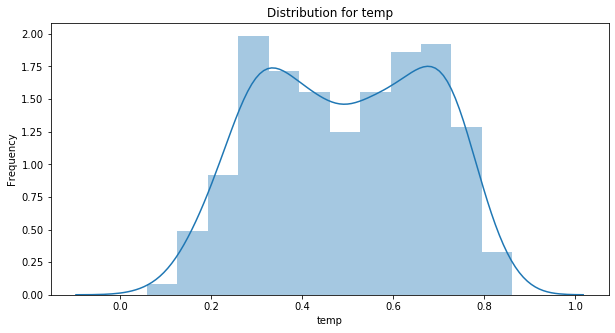

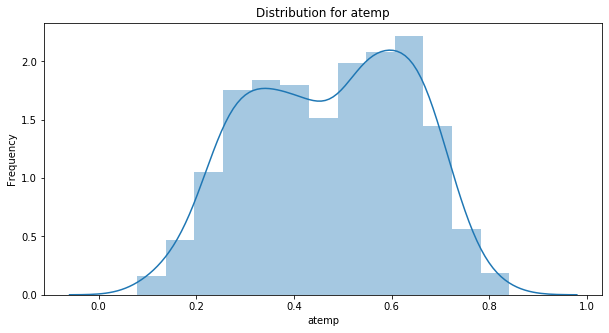

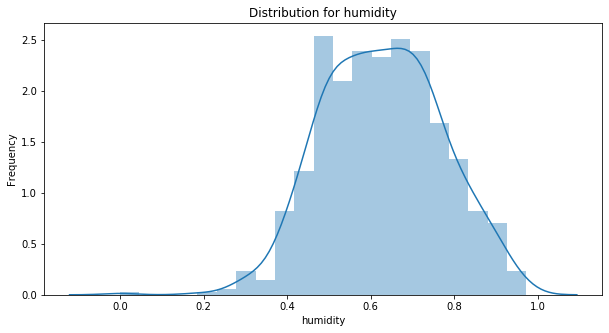

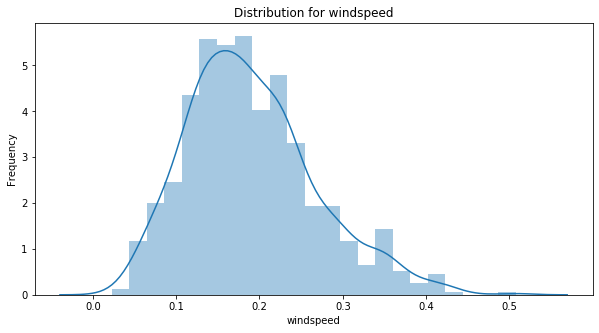

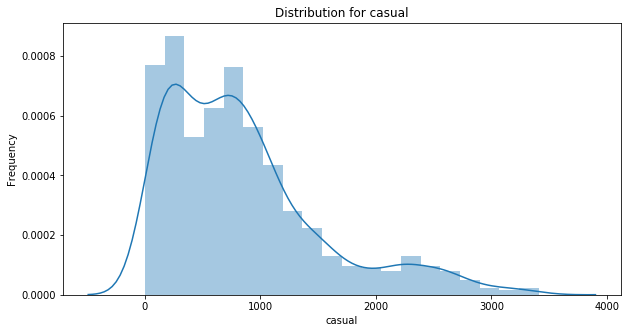

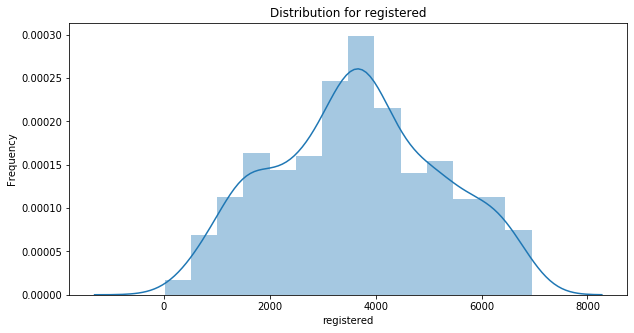

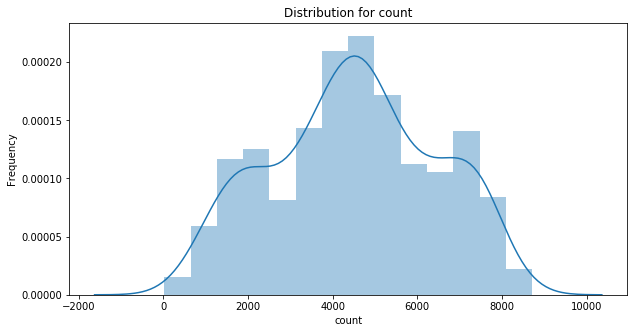

histograms plotted


In [16]:
get_hist(cont_vars.drop("ID"), bike_data)

In [17]:
def get_bars(col_names,df):
    # barplots for all categorical predictiors
    for name in col_names:
        plt.figure(figsize=(8,5))
        df[name].value_counts(dropna=False, normalize=True).sort_index().plot.bar()
        plt.ylabel("Frequency")
        plt.title(name)
        plt.savefig(output_path+"/"+name+"_barplot.png")
        plt.show()
    return print("Barplots Plotted")

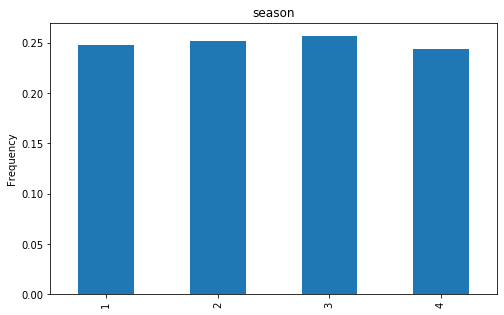

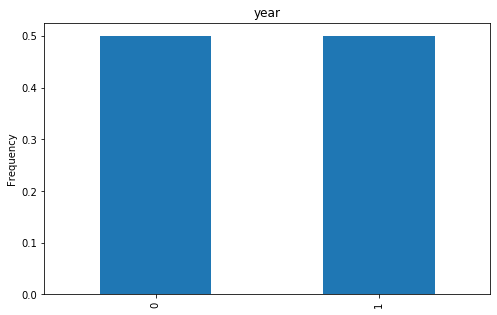

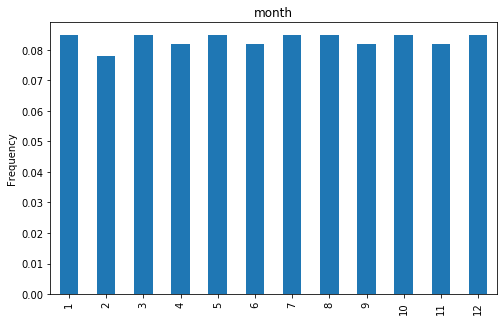

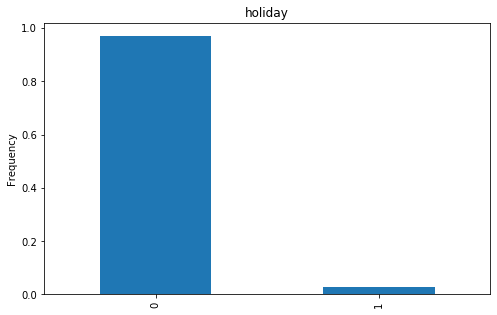

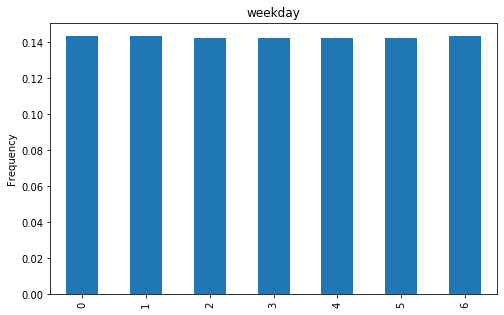

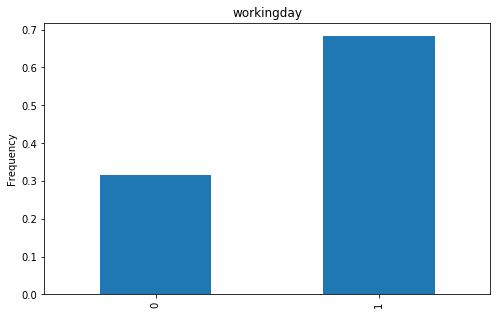

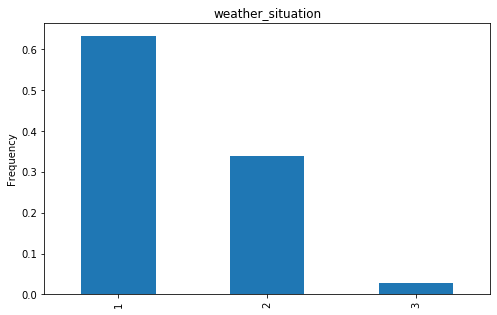

Barplots Plotted


In [18]:
get_bars(cat_vars,bike_data)

In [19]:
#bike_data.groupby(["season","month"]).tail(20)

## Bivariate Analysis

### Scatter plots

In [20]:
def get_scatter(col_names,df):
    for i in col_names:
        if i in [tar_var]:
            continue
        plt.figure(figsize=(8,8))
        plt.scatter(x=df[i],y=df[tar_var])
        plt.xlabel(i)
        plt.ylabel(tar_var)
        plt.title("scatter plot of "+i+" vs "+tar_var)
        plt.savefig(output_path+"/"+i+"_scatterplot.png")
        plt.show()
    return print("scatterplot plotted")        

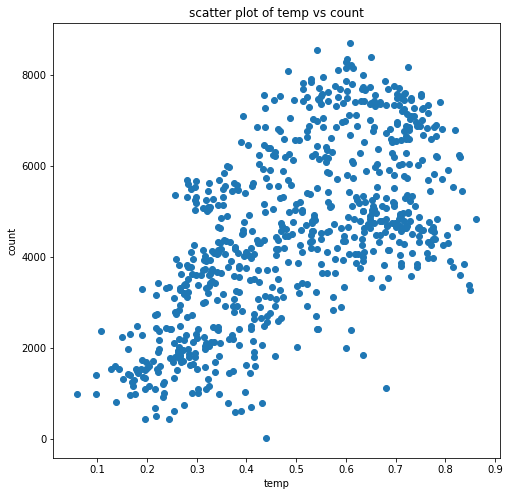

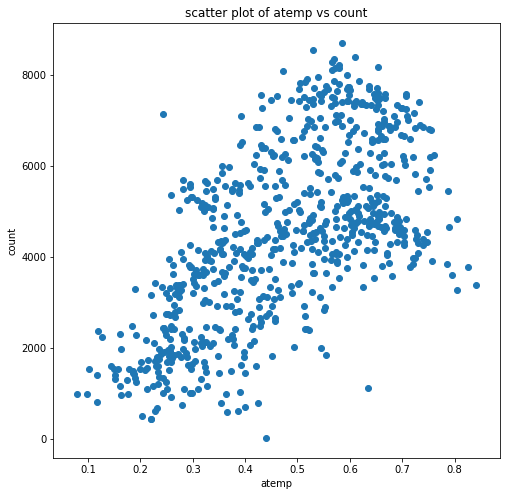

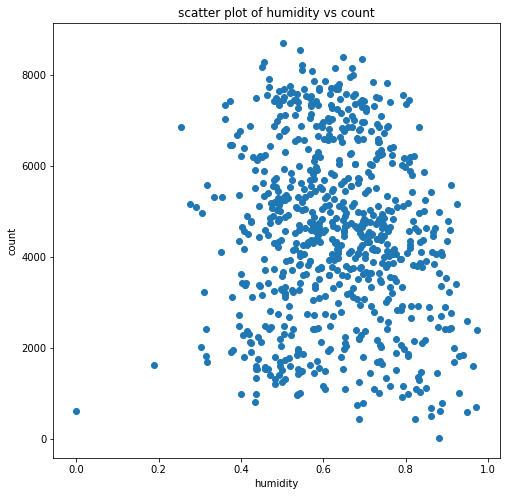

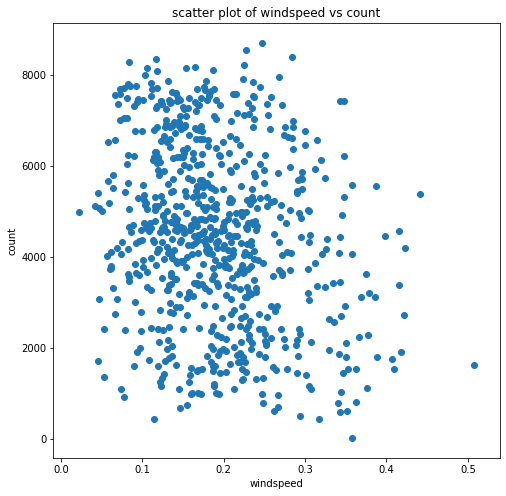

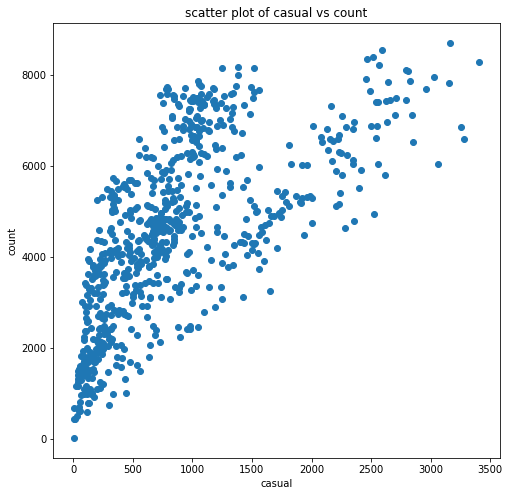

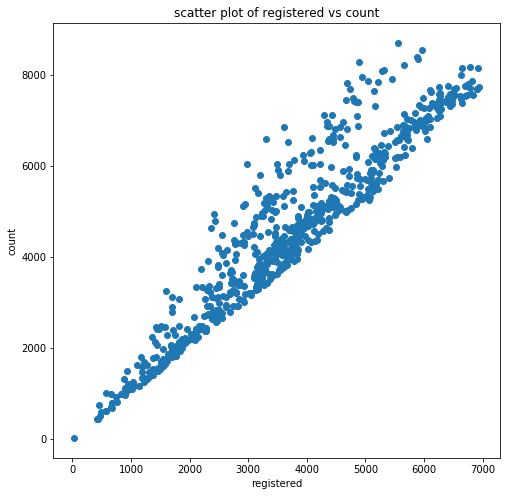

scatterplot plotted


In [21]:
get_scatter(cont_vars.drop("ID"),bike_data)

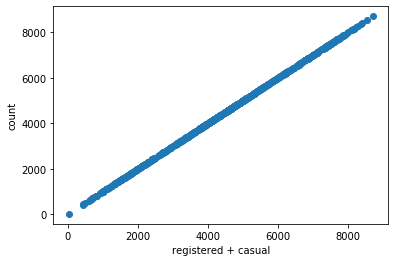

In [22]:
# checking linear combination of "registered" and "casual" with "count"
temp=(bike_data.registered+bike_data.casual)
plt.scatter(x=temp,y=bike_data['count'])
plt.xlabel("registered + casual")
plt.ylabel("count")
plt.show()

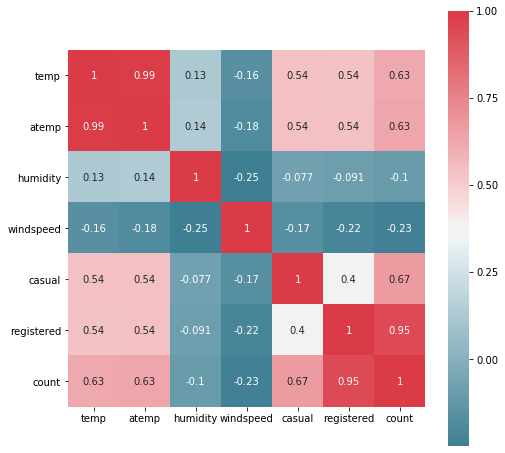

In [23]:
df_corr=bike_data.loc[:,cont_vars.drop("ID")]
#Generate correlation matrix
corr = df_corr.corr()
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(8, 8))
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.savefig(output_path+"/correlation_plot.png")


In [49]:
def get_countplot(feature,target_var,dataset):
    ncount = len(dataset)
    plt.figure(figsize=(12,8))
    ax = sns.countplot(x=feature,hue=target_var,data=dataset)
    plt.title(feature+ ': Survived Vs Dead')
    plt.xlabel(feature)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)

    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

    plt.savefig(feature+'_snscounter.png')
    plt.show()
    return print("countplot of "+feature+" plotted")

**Inferences**
> * "temp" and "atemp" are highly correlated, thus only one of them to be considered. 
* target variable "count" is not dependent on / affected by "windspeed" and "humidity" as correlation is highly negative. But "humidity" is somewhat dependent on "temp". So only windspeed is neglected.
* "windspeed" has no relation with other continuous predictors also.
* Another thing to notice here will be we need to check whether "count" is linear addition/combination of "casual" and "registered". After checking this, we realize that addition of "casual" and "registered" gives "count". So we can remove these features.
* Further "ID" column is not issential here at all as it's not giving any info regarding to problem statement.

In [24]:
bike_data.columns

Index(['ID', 'dateday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_situation', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# Missing Value Analysis

In [25]:
bike_data.isna().sum()

ID                   0
dateday              0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_situation    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
count                0
dtype: int64

#### There are no *missing values* in the data `

# Outlier Analysis

In [26]:
#boxplot analysis for categorical variables
def get_boxplot(col_names,df):
    for name in col_names:
        #if name in ignore: 
            #continue
        plt.figure(figsize=(10,8))
        sns.boxplot(x=name,y=tar_var,data=df,orient="v")
        plt.xlabel(name)
        plt.ylabel(tar_var)
        plt.title("Boxplot of "+ str(name))
        plt.savefig(output_path+"/"+name+"_boxplot.png")
        plt.show()

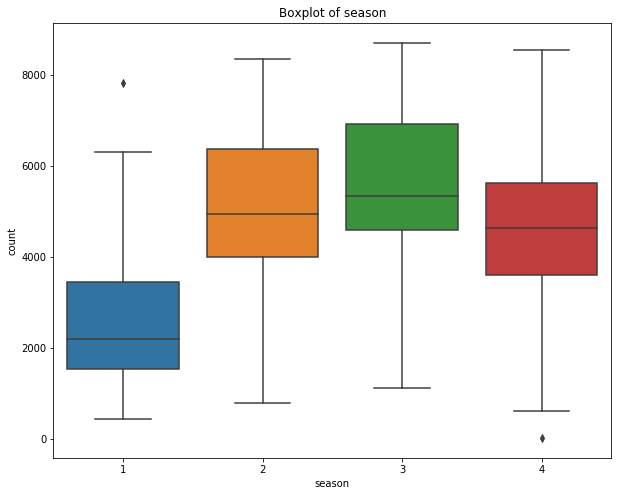

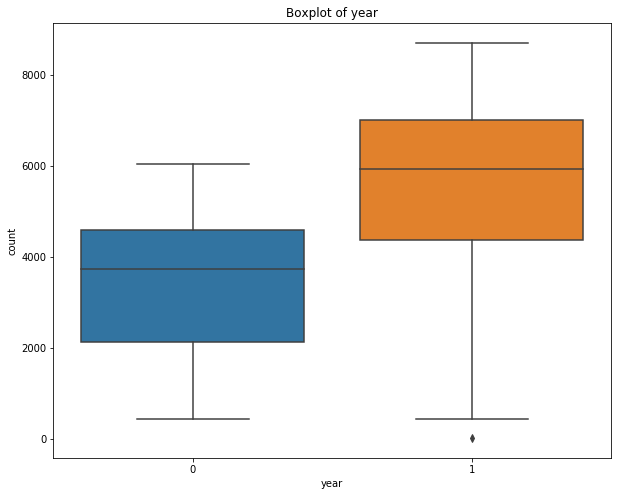

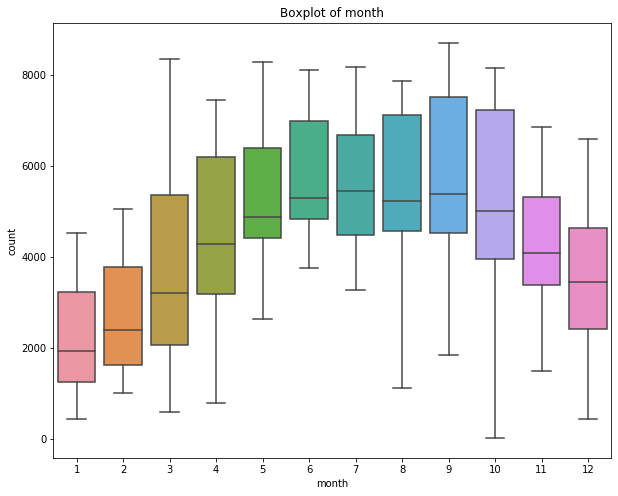

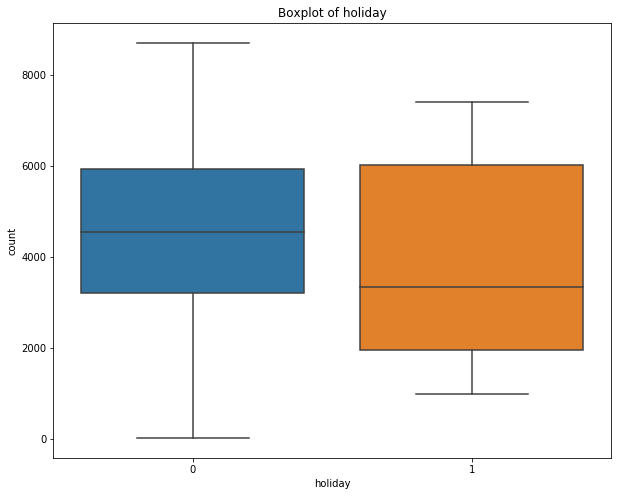

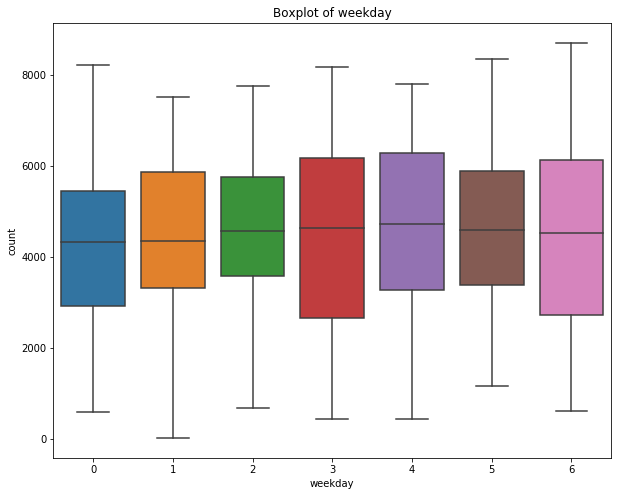

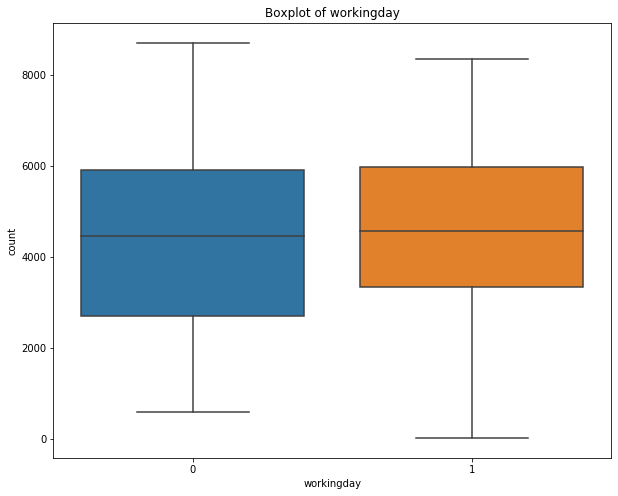

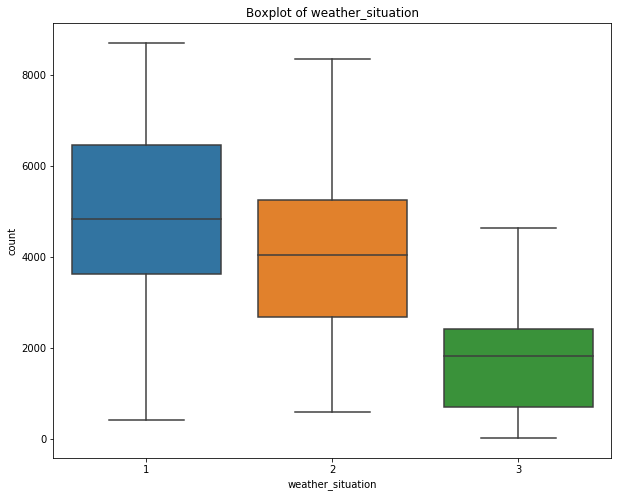

In [27]:
get_boxplot(cat_vars,bike_data)

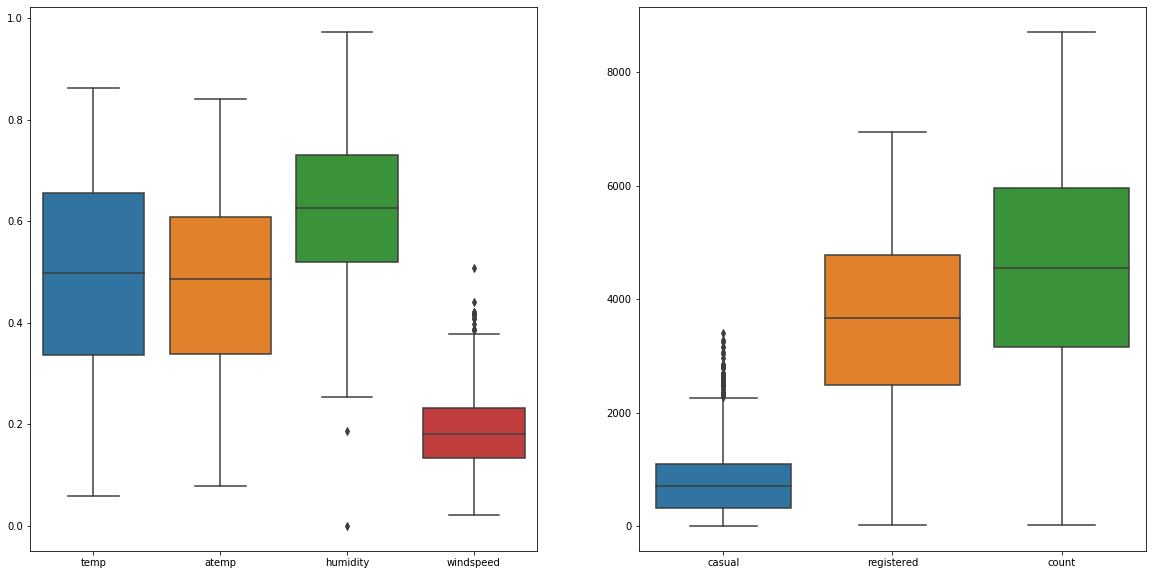

In [28]:
#boxplot analysis for continuous variables
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(data=bike_data[cont_vars.drop(["ID","casual","registered","count"])],ax=ax1)
sns.boxplot(data=bike_data[["casual","registered","count"]],ax=ax2)
plt.savefig(output_path+"/boxplot_cont.png")

#### here three variables have outliers => hum, windspeed, casual

In [29]:
def get_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low_cutoff  = q1-1.5*iqr
    high_cutoff = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] < low_cutoff) | (df_in[col_name] > high_cutoff)]
    return df_out

In [30]:
#detect and replace the outlier from the data with minima and maxima
def remove_outliers(dataset,cont_names): 
    for i in cont_names:
        q75,q25=np.percentile(dataset.loc[:,i],[75,25])
        iqr=q75-q25 #inter quartile range
        minimum=q25-(iqr*1.5)
        maximum=q75+(iqr*1.5)
        dataset[i]=np.clip(np.array(dataset[i]),a_min=minimum,a_max=maximum)
        dataset[i]    
    return 0

In [31]:
remove_outliers(bike_data,["humidity","windspeed"])

0

In [32]:
get_outlier(bike_data,"humidity")

,ID,dateday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count


In [33]:
#casual_outliers=get_outlier(bike_data,"casual")
#casual_outliers.casual.min()

In [34]:
#wind_outliers=get_outlier(bike_data,"windspeed")
#wind_outliers.windspeed.min()

In [35]:
for i in cat_vars:
    print(i, bike_data[i].unique(),"\n")

season [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4] 

year [0, 1]
Categories (2, int64): [0, 1] 

month [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12] 

holiday [0, 1]
Categories (2, int64): [0, 1] 

weekday [6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 0, 1, 2, 3, 4, 5] 

workingday [0, 1]
Categories (2, int64): [0, 1] 

weather_situation [2, 1, 3]
Categories (3, int64): [2, 1, 3] 



# Feature Selection


In [36]:
# b) Categorical variables 
# 1)(Use of ANOVA test as target variable is continuous in nature )
from scipy.stats import f_oneway
for i in cat_vars:
    f, p =f_oneway(bike_data[i], bike_data[tar_var])
    print("P value for the variable '"+str(i)+"' is "+str(p)+ " f_Stats= "+str(f))

P value for the variable 'season' is 0.0 f_Stats= 3947.7137569884007
P value for the variable 'year' is 0.0 f_Stats= 3951.216006001141
P value for the variable 'month' is 0.0 f_Stats= 3940.649636749688
P value for the variable 'holiday' is 0.0 f_Stats= 3952.044375898518
P value for the variable 'weekday' is 0.0 f_Stats= 3946.832768145286
P value for the variable 'workingday' is 0.0 f_Stats= 3950.894412386185
P value for the variable 'weather_situation' is 0.0 f_Stats= 3949.6463379356255


In [37]:
# Categorical variables 
#(Use of ANOVA test/f-test as target variable is continuous in nature and predictors are ccateogircal in nature )
#from scipy.stats import f_oneway
#for i in categorical_data:
#    f, p = f_oneway(bike_data[i][bike_data[i]==1], bike_data[tar_var][bike_data[i]==1])
#    print("P value for the variable '"+str(i)+"' is "+str(p)+" f_Stats= "+str(f))

### Remove Useless Features

In [38]:
to_be_removed=['ID','temp','casual','registered','dateday']
bike_data.drop(to_be_removed,inplace=True,axis=1)
bike_data.shape

(731, 11)

In [39]:
# Dummification
for i in cat_vars:
    temp=pd.get_dummies(bike_data[i],prefix=i)
    bike_data=bike_data.join(temp)
    bike_data.drop(i,axis=1)    
print(bike_data.shape)

(731, 43)


# Splitting Dataset

In [40]:
X=bike_data.drop(tar_var,axis=1)
y=bike_data[tar_var]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=1)

# Model Evaluation

In [41]:
# B) For continous variable
#import the required library and module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#function for MAPE
def MAPE(y_true,y_pred):
        mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
        return mape
# define a function to get error metrics
def get_error_metric(original,predicted):
    mape=MAPE(original,predicted)
    MSE=mean_squared_error(original,predicted)
    # root mean squred error
    RMSE=np.sqrt(MSE)
    #mean absolute error
    MAE=mean_absolute_error(original,predicted)
    # R square value
    r2=r2_score(original,predicted)
    
    results={'MAPE':mape,'MSE':MSE,'RMSE':RMSE,'MAE':MAE,'R^2 score':r2}
    return results

In [42]:
# scatter plot for original and predicted values
def evaluation_plot(original,predicted,plot_name):
    plt.figure(figsize=(8, 8))
    plt.scatter(predicted, original)
    plt.plot( [0,8000],[0,8000], color='red')
    plt.xlim(-100, 8000)
    plt.ylim(-100, 8000)
    plt.xlabel('prediction')
    plt.ylabel('original')
    plt.title(plot_name+' Model Evaluation Plot')
    plt.savefig(output_path+"/"+plot_name+"scatterplot.png")
    plt.show()

# Model Developement

## 1) Linear Regression

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     110.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):          1.66e-203
Time:                        19:30:44   Log-Likelihood:                -4706.3
No. Observations:                 584   AIC:                             9469.
Df Residuals:                     556   BIC:                             9591.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
season                560.3335    

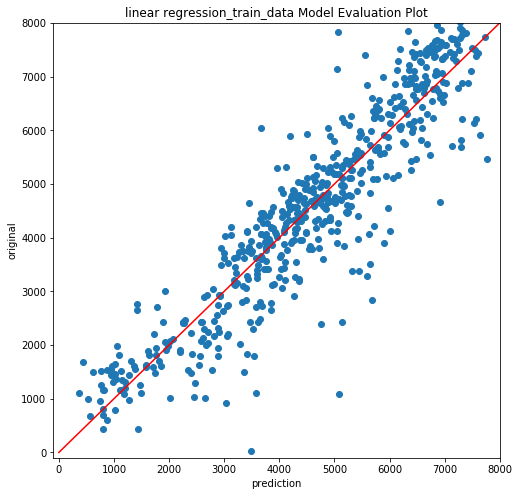

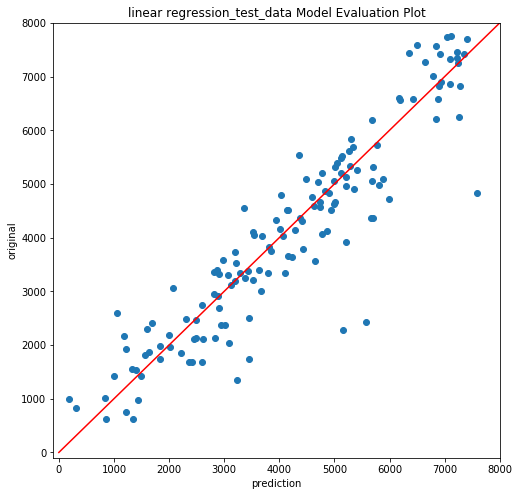

In [43]:
import statsmodels.api as sm
# Building model on top of training dataset
model_LR= sm.OLS(y_train.astype(float),X_train.astype(float)).fit()
# get the summary of the model
print((model_LR.summary()))
# Get predictions
pred_train = model_LR.predict(X_train)
pred_test = model_LR.predict(X_test)
# check error metrics
print("Error Metrics for train data")
print(get_error_metric(y_train,pred_train))
print("Error Metrics for test data")
print(get_error_metric(y_test,(pred_test)))
evaluation_plot(y_train,pred_train,"linear regression_train_data")
evaluation_plot(y_test,pred_test,"linear regression_test_data")

Error Metrics for train data
{'MAPE': 44.41480856516403, 'MSE': 585170.8561643836, 'RMSE': 764.9646110535988, 'MAE': 559.9965753424658, 'R^2 score': 0.842679932432269}
Error Metrics for test data
{'MAPE': 18.030486071099965, 'MSE': 554091.6258503401, 'RMSE': 744.3733108127535, 'MAE': 522.1700680272108, 'R^2 score': 0.8500655484747148}


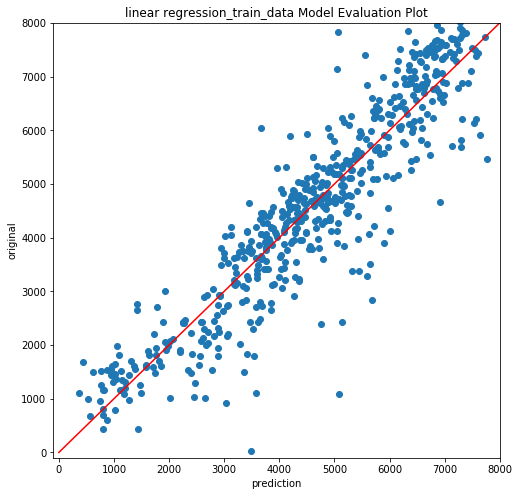

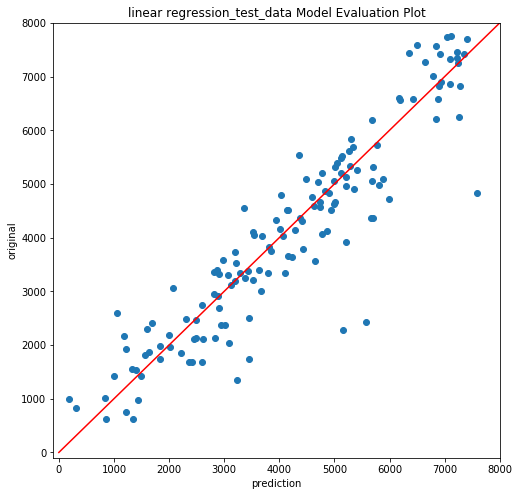

In [44]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)
# Get predictions
pred_train = fit_LR.predict(X_train)
pred_test = fit_LR.predict(X_test)
# check error metrics
print("Error Metrics for train data")
print(get_error_metric(y_train,pred_train.round()))
print("Error Metrics for test data")
print(get_error_metric(y_test,pred_test.round()))
evaluation_plot(y_train,pred_train,"linear regression_train_data")
evaluation_plot(y_test,pred_test,"linear regression_test_data")

## 2) Decision Trees

Error Metrics for train data
{'MAPE': 16.732392617393636, 'MSE': 476279.64074179763, 'RMSE': 690.1301621736277, 'MAE': 529.174310112844, 'R^2 score': 0.8719547556524487}
Error Metrics for test data
{'MAPE': 18.03158788184853, 'MSE': 554140.0869753989, 'RMSE': 744.4058617282637, 'MAE': 522.1836264533006, 'R^2 score': 0.8500524351341281}


<Figure size 432x288 with 0 Axes>

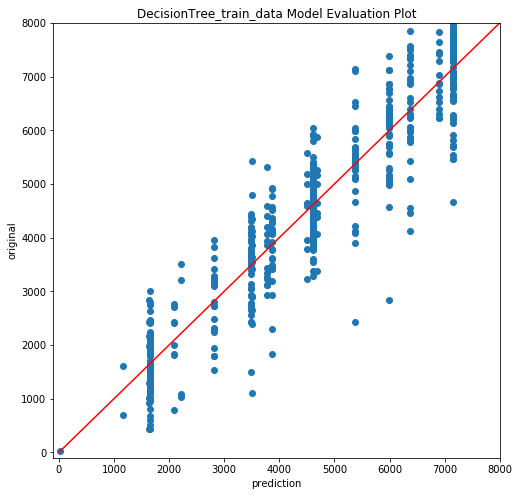

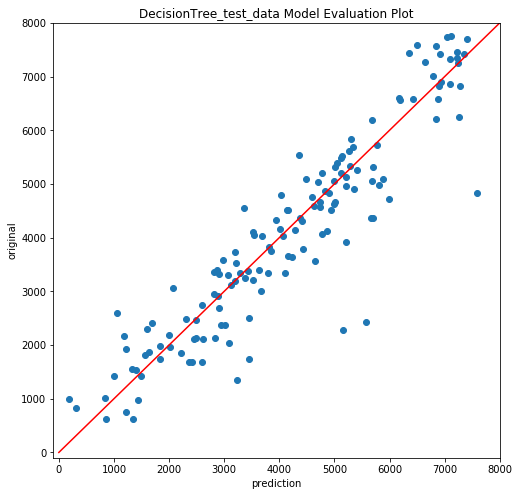

In [45]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
# Building model on training dataset
fit_DT = DecisionTreeRegressor(max_depth =5,min_samples_split=2,max_leaf_nodes=20,random_state=1).fit(X_train,y_train)
# get predictions
pred_train = fit_DT.predict(X_train)
pred_test = fit_LR.predict(X_test)
# check error metrics
print("Error Metrics for train data")
print(get_error_metric(y_train,pred_train))
print("Error Metrics for test data")
print(get_error_metric(y_test,pred_test))
plt.figure()
evaluation_plot(y_train,pred_train,"DecisionTree_train_data")
evaluation_plot(y_test,pred_test,"DecisionTree_test_data")

## 3) Random Forest

Error Metrics for train data
{'MAPE': 18.05217092261252, 'MSE': 68495.63356164383, 'RMSE': 261.71670478141783, 'MAE': 175.38698630136986, 'R^2 score': 0.981585313782296}
Error Metrics for test data
{'MAPE': 15.05464885198876, 'MSE': 362852.14965986396, 'RMSE': 602.3721023253516, 'MAE': 394.5170068027211, 'R^2 score': 0.9018140042081833}


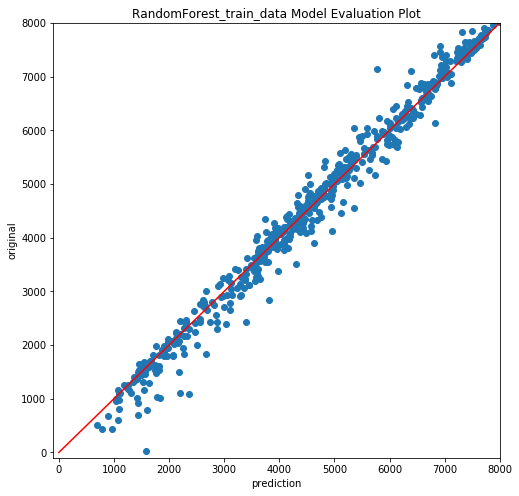

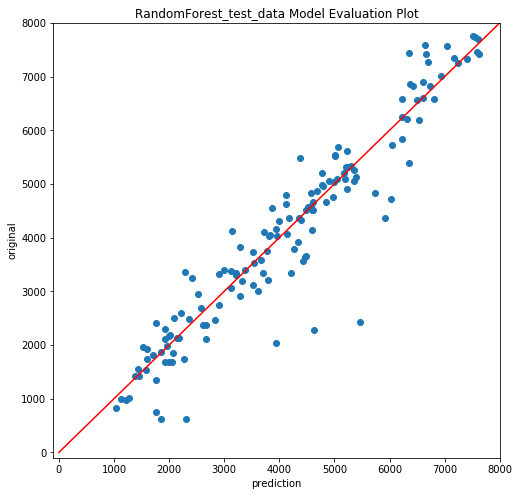

In [46]:
# Importing libraries for Decision Tree 
from sklearn.ensemble import RandomForestRegressor
# Building model on training dataset
fit_RF = RandomForestRegressor(n_estimators = 600,random_state=1).fit(X_train,y_train)
# Get Predictions
pred_train = fit_RF.predict(X_train)
pred_test = fit_RF.predict(X_test)
# check error metrics
print("Error Metrics for train data")
print(get_error_metric(y_train,pred_train.round()))
print("Error Metrics for test data")
print(get_error_metric(y_test,pred_test.round()))
evaluation_plot(y_train,pred_train,"RandomForest_train_data")
evaluation_plot(y_test,pred_test,"RandomForest_test_data")

## 4) Gradient Boosting

Error Metrics for train data
{'MAPE': 11.987422674430254, 'MSE': 178758.17082296, 'RMSE': 422.79802603957364, 'MAE': 307.41521805903955, 'R^2 score': 0.9519418179905869}
Error Metrics for test data
{'MAPE': 14.097118412348486, 'MSE': 372109.94793948624, 'RMSE': 610.0081539942612, 'MAE': 426.9324967218377, 'R^2 score': 0.89930888981441}


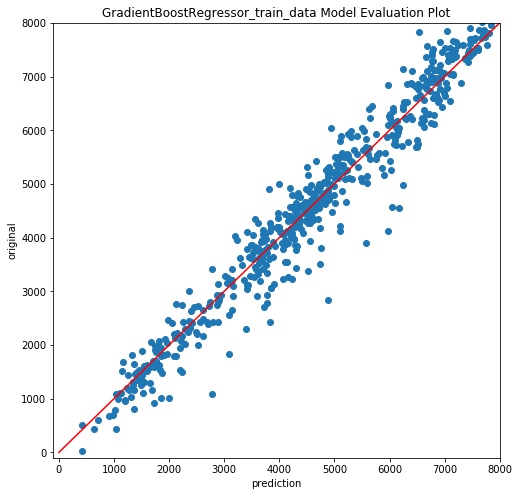

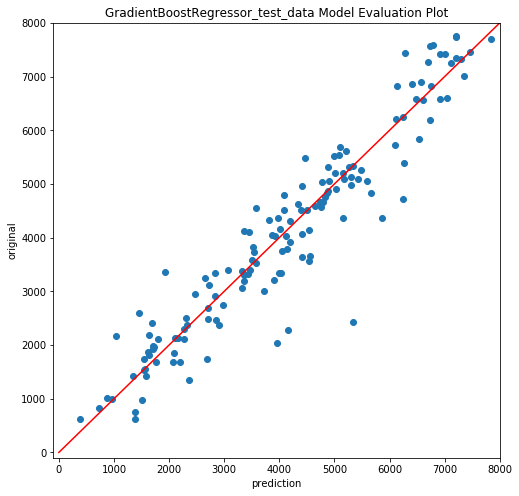

In [47]:
# Importing library for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor(random_state=1).fit(X_train, y_train)

# Get the predictions
pred_train = fit_GB.predict(X_train)
pred_test = fit_GB.predict(X_test)
print("Error Metrics for train data")
print(get_error_metric(y_train,pred_train))
print("Error Metrics for test data")
print(get_error_metric(y_test,pred_test))
evaluation_plot(y_train,pred_train,"GradientBoostRegressor_train_data")
evaluation_plot(y_test,pred_test,"GradientBoostRegressor_test_data")

## Deployment 

In [50]:
#Service Provider End

import pickle
# Serialize mlp_nn object into a file called mlp_nn.pkg on disk using pickle
with open('mlp_rf.pkl', 'wb') as handle:
    pickle.dump(fit_RF, handle, pickle.HIGHEST_PROTOCOL)

In [88]:
# Client End
import pickle
class my_predictor():
    def __init__(self):
        pass
  
    def deserialize(self):
    # de-serialize mlp_rf.pkl file into an object called model using pickle
        with open('mlp_rf.pkl', 'rb') as handle:
            model = pickle.load(handle)
        return model


In [90]:
x=my_predictor().deserialize()
test_predict=x.predict(X_test)
get_error_metric(y_test,pred_test)

{'MAPE': 14.097118412348486,
 'MSE': 372109.94793948624,
 'RMSE': 610.0081539942612,
 'MAE': 426.9324967218377,
 'R^2 score': 0.89930888981441}